# **Visualizing with Seaborn**



This notebook is written in the **self-study** format. It means there is no lecture video included. Please carefully read through the content, example, and complete all the tasks. 

🚨 **YOU DO NOT HAVE PERMISSION TO OVERWRITE THIS NOTEBOOK. PLEASE MAKE A COPY OF IT IF YOU WANT TO WRITE AND RUN YOUR OWN CODE.** 

#1/ What is Seaborn?

**Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn also provides multiple of color palette to enhance the visual quality: https://seaborn.pydata.org/tutorial/color_palettes.html

![](https://seaborn.pydata.org/_static/scatterplot_matrix_thumb.png)
![](https://seaborn.pydata.org/_static/errorband_lineplots_thumb.png)
![](https://seaborn.pydata.org/_static/scatterplot_sizes_thumb.png)

In [ ]:
import pandas as pd

# Import Seaborn
import seaborn as sns

# 2/ A Simple Plot




A visualization code by Seaborn would look like this. 

```
sns.barplot(data = dataframe,
            x = 'column_1',
            y = 'column_2')
```

This is used to plot a `bar chart`, using data from `dataframe`, with `column_1` as x, and `column_2` as y.


#3/ Examples

In [ ]:
# Load an example dataset
df = pd.read_csv('https://www.dropbox.com/s/zhxqmtf7fr3sabt/demographic_data.csv?dl=1')
df.head()

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


## [sns.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)


**Task:** Visualize the distribution of the `Income Group`.


Since it is **one categorical column** and we concern about **distribution**. 

Countplot would be chosen.

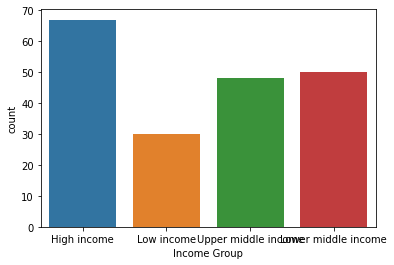

In [ ]:
sns.countplot(data=df,
              x='Income Group')

*Please ignore the overlapped labels on the x-axis. You will learn to edit it in Matplotlib lecture.*

You can change the color of the bars by simple call `color`.

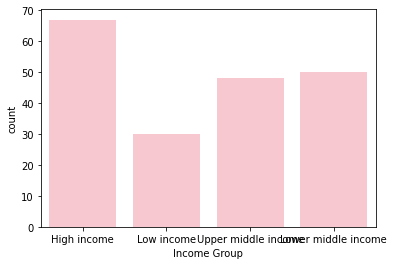

In [ ]:
sns.countplot(data=df,
              x='Income Group',
              color='pink')

Color name in Seaborn

<img src="https://i.stack.imgur.com/lFZum.png" height=700>

## [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)



**Task:** Visualize the distribution of Internet rate to see which range of Internet rate is more common.

We are talking about **distribution** of **one continuous** column. There are two options for this tasks Histogram or Boxplot. However, we want to highlight **which range is more popular**. Histogram should be a better choice. 

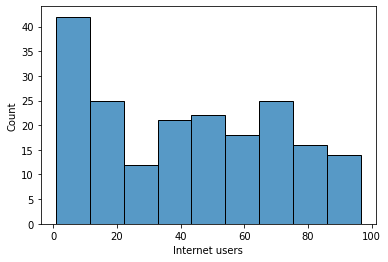

In [ ]:
sns.histplot(data=df,
             x='Internet users')

I recommend you to read more about Histogram at 

https://chartio.com/learn/charts/histogram-complete-guide/#choose-interpretable-bin-boundaries

## [sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

**Task:** Visualize the distribution of Internet rate to see if there is any countries have significant high or low Internet users rate. 

We are talking about **distribution** of **one continuous** column, and furthermore, focusing on **detecting** outliers. There is no better choice than Boxplot.

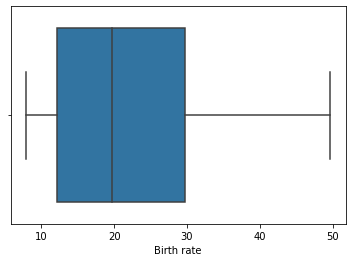

In [ ]:
# Visualize the distribution of Internet rate
sns.boxplot(data=df,
            x='Birth rate')

## [sns.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html) 



**Task:** Compare the average Internet users rate between income groups.

Since the task involves **comparison** and uses data from **2 column (1 continuous - Internet users, 1 categorical - Income group)**. Bar chart should be an appropriate choice.

In [ ]:
# Calculate the "mean" value of each category
# .reset_index to return "income group" as a column, not an index 
# so that we can specify the column name in the seaborn syntax later.

plot_data = df.groupby('Income Group')['Internet users'].mean().reset_index()
plot_data

,Income Group,Internet users
0,High income,74.231684
1,Low income,5.988333
2,Lower middle income,22.366386
3,Upper middle income,40.279577


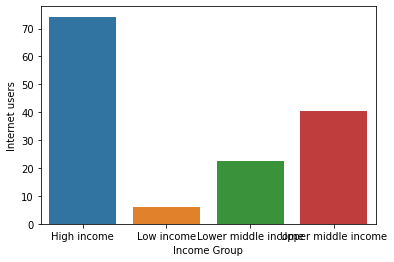

In [ ]:
sns.barplot(data=plot_data,
            x = 'Income Group',
            y = 'Internet users')

**YOUR TASK** : Plot the comparison between the median of birth rate between income groups.

In [ ]:
# YOUR CODE HERE 
plot_data = df.groupby('Income Group')['Birth rate'].median().reset_index()
plot_data

,Income Group,Birth rate
0,High income,11.3000
1,Low income,36.9275
2,Lower middle income,26.8950
3,Upper middle income,18.7795


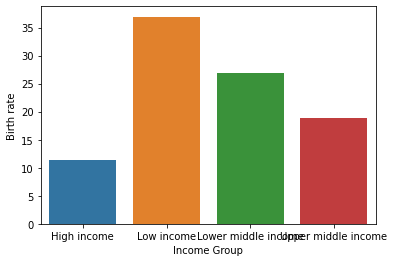

In [ ]:
sns.barplot(data=plot_data,
            x = 'Income Group',
            y = 'Birth rate')

When plotting a bar chart, one should consider if the bar should be sorted. There are two options:

- Sort by bars' values (metrics): Bar with highest value is plotted first.
    This is used when you want to highlight the most or the least regarding values of the bars.

- Sort by categories name (dimension): When your groups are ordinal. It means the categories are already sorted in its name. In this example: High income > Upper middle income > Lower middle income > Low income. The bar should be sorted following that fashion. 

1/ To sort by values (metrics): You can sort from the plot_data. **Any change in the plot_data table will effect the plot in seaborn.**

In [ ]:
plot_data = df.groupby('Income Group')['Internet users'].mean()
plot_data = plot_data.reset_index().sort_values(by='Internet users')
plot_data

,Income Group,Internet users
1,Low income,5.988333
2,Lower middle income,22.366386
3,Upper middle income,40.279577
0,High income,74.231684


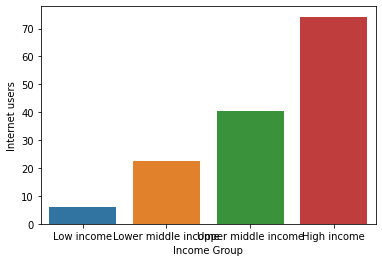

In [ ]:
sns.barplot(data=plot_data,
            x = 'Income Group',
            y = 'Internet users')

2/ To sort categories (dimension): You can use `order` parameter in seaborn directly.

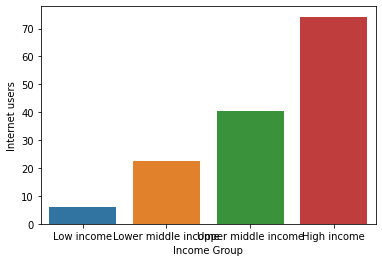

In [ ]:
# Using `order` to sort by categories' names.
sns.barplot(data=plot_data,
            x = 'Income Group',
            y = 'Internet users',
            order=["Low income", "Lower middle income", "Upper middle income", "High income"])

**YOUR TASK** : Order the bars in your Birth rate bar chart of previous task in order to high light the groups that have highest and lowest birth rate values.

In [ ]:
# YOUR CODE HERE 
plot_data = df.groupby('Income Group')['Birth rate'].median().reset_index()
plot_data

,Income Group,Birth rate
0,High income,11.3000
1,Low income,36.9275
2,Lower middle income,26.8950
3,Upper middle income,18.7795


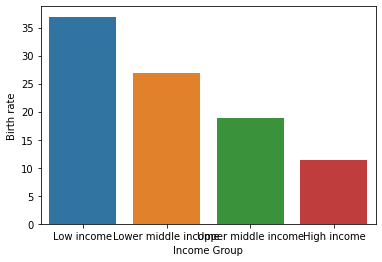

In [ ]:
sns.barplot(data=plot_data,
            x = 'Income Group',
            y = 'Birth rate',
            order=["Low income", "Lower middle income", "Upper middle income", "High income"])

##[sns.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)



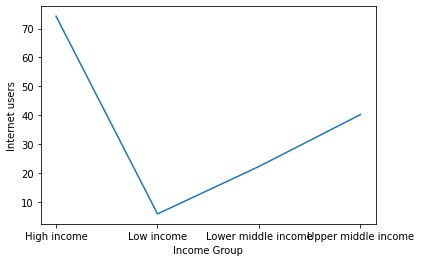

In [ ]:
# Line chart to compare average Internet users rate between Income Group

plot_data = df.groupby('Income Group').mean()[['Internet users']].reset_index()
sns.lineplot(data=plot_data, 
             x='Income Group', 
             y='Internet users')

❗️ **Notice**: There is no `order` parameter in lineplot. If you want the change the order, you have to change in the plotting data.

## [sns.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)



**Task:** Is there any relation between `Birth rate` and `Income group`?

The chart concerns about **relation** and uses data from **2 continuous columns**. Scatterplot is a good choice. 

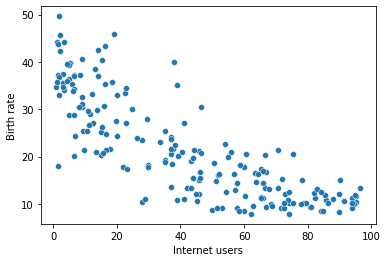

In [ ]:
 sns.scatterplot(data=df,
                x='Internet users',
                y='Birth rate')

Here we can observe that countries with higher birth rate tend to have lower internet users rate. The two columns are negatively correlated. 

Scatterplot is a good visualization method to quickly see if the two variables are correlated to each other. We will learn how to further quantify this observation in the Correlation and Heatmap lecture.

One way to analyse this scatter chart further is to add a **breakdown** dimension by using `hue`.

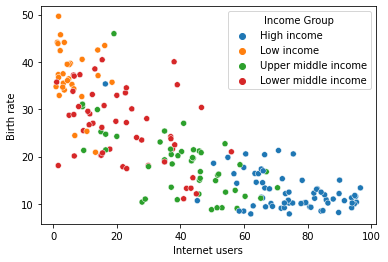

In [ ]:
 sns.scatterplot(data=df,
                x='Internet users',
                y='Birth rate',
                 hue='Income Group')

We can see that countries in High income group tend to have high internet users rate and low birth rate. The opposite thing happens to countries in Low income group. 

## [Extra] sns.pairplot

To quickly plot the distribution of one variable and its correlation to other columns as a pair. This function takes an extreme amount of time to run. So beware.  

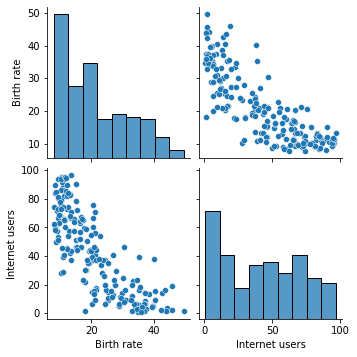

In [ ]:
sns.pairplot(df)